# Central Tendencies: Mean, Median, Mode
# Width: variance and standard deviation

We'll create random numbers (virtual dice - first a single die, then 2 - and then moving to a Gaussian) and calculate mean, median, mode and variance.

You can either run this in binder https://mybinder.org/v2/gh/JonasRademacker/JupyterNotebooksForTeachingMath/master?filepath=Mean_mode_median_variance_sigma.ipynb ,

or - much much better, although a bit hasslesome the first time you set it up - you can run it on your own computer. To do that:

1) Download and install anaconda (https://www.anaconda.com/).

2) Download this file from github. Do so by clicking on "Raw", and then asking your browser to save the file (in Firefox: File -> Save Pages As...)

Alternatively, you can download the entire github repository from https://github.com/JonasRademacker/JupyterNotebooksForTeachingMath by clicking the green "Code" button that appears on that page - but there is a chance that I will update and add files as the course progresses, so your download will be out-dated at some point.

3) Open a terminal window, go to the directory where this file is, and type: jupyter notebook

This file should now open in your browser (again), and you can edit it and execute and save the code.

Remember, to excecute each field, do shift+return. Execute the fields in order. If things got messy, go to Kernel and select Restart and Clear all output - and start Shift+Return from the top.


First import some libraries

In [1]:
from math import *
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

Let's initialise the random number generated. Changing the seed will give your different outcomes for the (pseudo) random numbers generated in this sheet.

In [2]:
np.random.seed(314159)

Now create a virtual die that we can throw N times. The return value is an array of N numbers from 1 to 6.

In [3]:
def throwOneDie(Ntimes):
    flatRandom = np.random.random(Ntimes)  # random numbers from 0 to 1
    return [int(x*6)+1 for x in flatRandom]  # ... translated to integers from 1 to 6, and returned

Now we have the die, we throw it, say, 200 times, put the result into an array

In [4]:
HowOften=200
dieArray = throwOneDie(HowOften)

... and put the result into a histogram

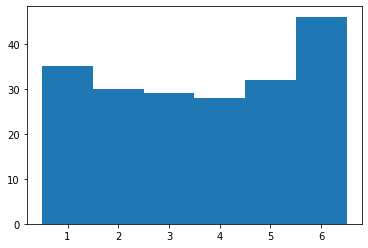

In [5]:
h=plt.hist(dieArray, 6, range=(0.5, 6.5)) # make histogram
plt.show()     # and plot it

Calulate arithmetic mean:

In [6]:
def ArithmeticMean(arrayOfNumbers):
    sum=0
    for x in arrayOfNumbers:
        sum += x
    N=len(arrayOfNumbers) # N = the number of data points in the array "numbers"
    return sum/N
    
mean = ArithmeticMean(dieArray)
print("The mean is ", mean)

The mean is  3.65


This should be close to 3.5; the more throws of the die you average, the closer you should, typically, get. In what way your result is far or not so far away from the expected value of exactly zero is something we will discuss also in this course, when we estimate the uncertainty on the mean. But for now, we are happy to have successfully calculated the mean of a dataset.

Let's now calculate the median.

In [7]:
def Median(arrayOfNumbers):
    # sort the numbers:
    arrayOfNumbers.sort()
    # print sorted values, if there aren't too many
    if len(arrayOfNumbers) < 101: print(arrayOfNumbers)
    # calcualate median
    # distinguish case where sample length is odd (we take the value of the mid point)
    # as in {1, 2, 3} => median 2
    # and where it is even (take the average of the two midpoints)
    # as in {1, 2, 3, 4} => median 2.5
    mp = int((len(arrayOfNumbers)+1)/2)
    median = arrayOfNumbers[mp]
    if len(arrayOfNumbers)%2 == 0: 
        median = 0.5*(median + arrayOfNumbers[mp+1])
    return median

median = Median(dieArray)
print("Median = ", median)

Median =  4.0


Now the mode:

In [8]:
def Mode(arrayOfResults):
    frequency={}  # a python "dictionary", like C++ STL map
    for x in arrayOfResults:
        if x in frequency:
            frequency[x] += 1
        else:
            frequency[x]  = 1
    #print(frequency.items())

    max  = -1
    mode = -1
    for xy in frequency.items():
        if(xy[1] > max):
            max  = xy[1]
            mode = xy[0]
    return mode

mode = Mode(dieArray)
print("Mode is ", mode)

Mode is  6


Of course for this distribution, the mode is equally likely to be 1, 2, 3, 4, 5 or 6, because each of these values is equally likely to have the largest number of events.

## Mean, Median, Mode for 2 dice

Let's do the same thing for two dice; but why not, for efficiencies sake, write code more generally, for M dice.

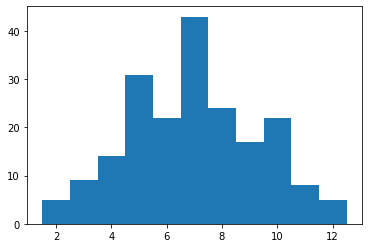

In [9]:
def throw_M_dice(M):
    flatRandom = np.random.random(M)  # random numbers from 0 to 1
    return np.sum([int(x*6)+1 for x in flatRandom])

def throw_M_dice_N_times(M, N):
    results=[]
    for counter in range(N):
        results.append( throw_M_dice(M) )
    return results

diceRandom2 = throw_M_dice_N_times(2, HowOften)
h=plt.hist(diceRandom2, 11, range=(1.5, 12.5)) # make histogram
plt.show()

In [10]:
mean2 = ArithmeticMean(diceRandom2)
median2 = Median(diceRandom2)
mode2 = Mode(diceRandom2)
print("Mean (2dice) \t = ", mean2)
print("Median (2 dice)\t = ", median2)
print("Mode (2dice) \t = ", mode2)

Mean (2dice) 	 =  6.97
Median (2 dice)	 =  7.0
Mode (2dice) 	 = 7


## Mean, median mode for Gaussian

We can try this with continuous distributions, too. Let's try a "standard normal", a Gaussian "bell curve" of width one and mean zero; we will discuss this distribution in detail, later in the course

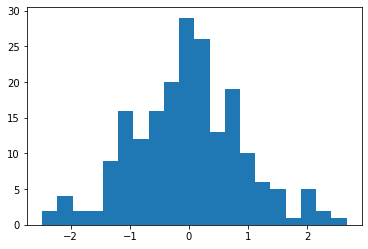

In [11]:
#Return a sample of numbers from “standard normal” (mean 0, sigma 1) distribution.
randomGauss = np.random.randn(HowOften) 
nbins = int(len(randomGauss)/10) # base number of bins based on sample size...
if nbins > 100: nbins=100  #... but within some...
if nbins < 5: nbins=5      #... sensible limits.
h=plt.hist(randomGauss, nbins) # make histogram with nbins bins
plt.show()

In [12]:
meanG = ArithmeticMean(randomGauss)
print("Mean Gauss = ", meanG)
medianG = Median(randomGauss)
print("Median Gauss = ", medianG)
#(note that calculating the mode makes no sense in a continuously distributed variable
# although you could quite sensibly calculate the mode of the histogram we make of it;
# won't do that here, though)

Mean Gauss =  -0.033847836064661796
Median Gauss =  -0.013787873537881721


# Variance and Standard Deviation

First write a function that calculates the variance for a dataset:

In [13]:
def Variance(arrayOfNumbers):
    sum=0
    sumsq=0
    for x in arrayOfNumbers:
        sum   += x
        sumsq += x**2
    N = len(arrayOfNumbers)
    mean   = sum/N
    meansq = sumsq/N
    return meansq - mean**2

Apply it to our single-die dataset:

In [14]:
V1     = Variance(dieArray)
sigma1 = sqrt(V1)
print("Variance for 1 die = ", V1, ", standard deviation = ", sigma1)

Variance for 1 die =  3.2775000000000016 , standard deviation =  1.8103866990231676


For the two dice:

In [15]:
V2     = Variance(diceRandom2)
sigma2 = sqrt(V2)
print("Variance for 2 dice = ", V2, ", standard deviation = ", sigma2)

Variance for 2 dice =  5.4191 , standard deviation =  2.327896045788987


In [16]:
VG     = Variance(randomGauss)
sigmaG = sqrt(VG)
print("Variance for 'standard normal' distribution = ", VG)
print("Standard deviation = ", sigmaG)

Variance for 'standard normal' distribution =  0.8697724751661347
Standard deviation =  0.9326159312204219


## Task:
What are mean, variance and standard deviation for 4, 8, 16, 32, 64 dice? Does this behave like what you would expect?